In [3]:
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold,cross_val_score as CVS,train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import numpy as np
from time import time
import datetime

In [4]:
data=load_boston()
X = data.data
y = data.target

In [7]:
Xtrain, Xtest, Ytrain, Ytest = TTS(X, y ,test_size=0.3, random_state=222)

In [9]:
reg =XGBR(n_estimators=100).fit(Xtrain, Ytrain)
reg.predict(Xtest)
reg.score(Xtest,Ytest)

0.89984556067178

In [10]:
MSE(Ytest, reg.predict(Xtest))

9.52626371086575

In [15]:
reg=XGBR(n_estimators=100)
CVS(reg,Xtrain,Ytrain,cv=5).mean()

0.8063452433639737

60 0.8063543980951315


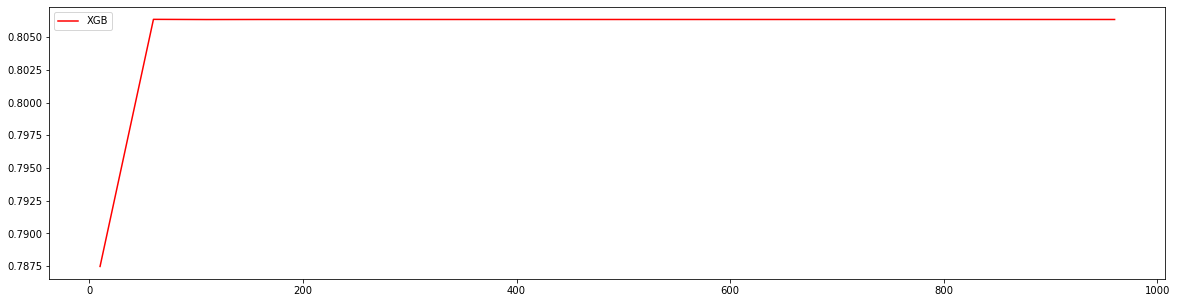

In [18]:
import matplotlib.pyplot as plt
axisx =range(10,1010,50)
rs =[]
for i in axisx:
    reg=XGBR(n_estimators=i,random_state=3177)
    rs.append(CVS(reg,Xtrain,Ytrain,cv=5).mean())
print(axisx[rs.index(max(rs))],max(rs))
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="red",label="XGB")
plt.legend()
plt.show()

0.9052631578947369 0.8302477892409901 0.0032364634438554487
0.9157894736842106 0.8129324487119678 0.0008360548805975085
0.9 0.8253339580759753 0.001085216080917592 0.03159344228232274


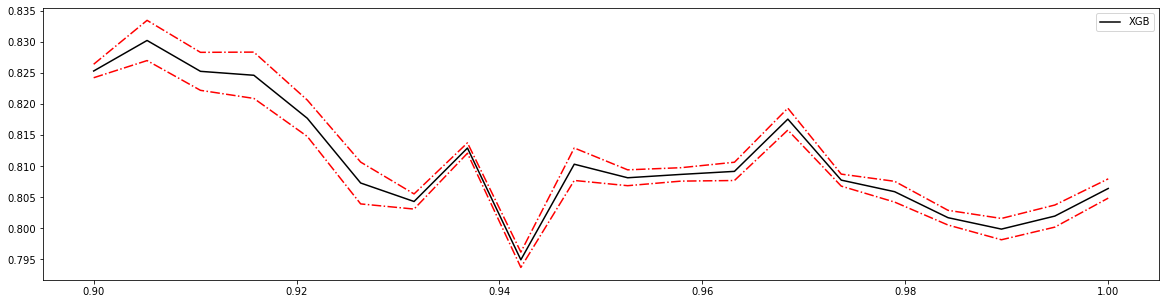

In [32]:
import matplotlib.pyplot as plt
axisx = np.linspace(0.9,1,20)
rs =[]
var=[]
ge=[]
for i in axisx:
    reg=XGBR(n_estimators=50,subsample=i,random_state=57)
    cvresult=CVS(reg,Xtrain,Ytrain,cv=5)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1-cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(max(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

In [23]:
def regassess(reg,Xtrain,Ytrain,cv,scoring=["r2"],show=True):
    score=[]
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i],CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [24]:
regassess(reg,Xtrain,Ytrain,cv=3,scoring=["r2","neg_mean_squared_error"])

r2:-6.08
neg_mean_squared_error:-557.86


[-6.0834267627878065, -557.8607344632769]

In [27]:
from time import time
import datetime
for i in [0,0.2,0.5,0.75,0.9,0.95,1]:
    time0=time()
    reg = XGBR(n_estimators=100,random_state=223,learning_rate=i)
    print("learning rate={}".format(i))
    regassess(reg,Xtrain,Ytrain,cv=5,scoring=["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
    print("\t")

learning rate=0
r2:-6.13
neg_mean_squared_error:-557.69
00:02:690572
	
learning rate=0.2
r2:0.82
neg_mean_squared_error:-14.27
00:03:895675
	
learning rate=0.5
r2:0.78
neg_mean_squared_error:-17.03
00:03:483773
	
learning rate=0.75
r2:0.75
neg_mean_squared_error:-19.27
00:02:686355
	
learning rate=0.9
r2:0.76
neg_mean_squared_error:-19.13
00:02:448534
	
learning rate=0.95
r2:0.74
neg_mean_squared_error:-20.94
00:02:480295
	
learning rate=1
r2:0.70
neg_mean_squared_error:-23.34
00:02:768013
	
